In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [5]:
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)

In [6]:
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import FormatStrFormatter

In [1]:
import torch

In [12]:
def tril_indices(x, seq_len, offset = True):
    if offset:
        a, b = [], []
        for i in range(seq_len):
            for j in range(i):
                a.append(i)
                b.append(j)
    else:
        a, b = [], []
        for i in range(seq_len):
            for j in range(i+1):
                a.append(i)
                b.append(j)
    i = torch.tensor(a)
    j = torch.tensor(b)
    
    return i, j

def tril_indicesB(rows, cols, offset=0):
    return torch.ones(rows, cols, dtype=torch.uint8).tril(offset).nonzero().t()



In [13]:
tril_indicesB(4, 3, -1)

tensor([[1, 2, 2, 3, 3, 3],
        [0, 0, 1, 0, 1, 2]])

In [14]:
x = torch.ones(1024, 3, 3)
        
        # allow gradient computation for adversarial training here ?!
#        with torch.no_grad():
# START indentation if doing nominal training
batch_size, _, seq_len = x.size()

In [35]:
seq_len = 10024

In [50]:
%%time
torch.tril_indices(seq_len, seq_len, offset = -1, device=x.device)

CPU times: user 205 ms, sys: 1.65 s, total: 1.85 s
Wall time: 1.85 s


tensor([[    1,     2,     2,  ..., 10023, 10023, 10023],
        [    0,     0,     1,  ..., 10020, 10021, 10022]])

In [44]:
%%time
tril_indices(x, seq_len, offset = True)

CPU times: user 9.61 s, sys: 5.72 s, total: 15.3 s
Wall time: 15.3 s


(tensor([    1,     2,     2,  ..., 10023, 10023, 10023]),
 tensor([    0,     0,     1,  ..., 10020, 10021, 10022]))

In [49]:
%%time
tril_indicesB(seq_len, seq_len, offset = -1)

CPU times: user 971 ms, sys: 1.24 s, total: 2.21 s
Wall time: 2.03 s


tensor([[    1,     2,     2,  ..., 10023, 10023, 10023],
        [    0,     0,     1,  ..., 10020, 10021, 10022]])

In [27]:
path = '/eos/user/a/anstein/ParT/testADV3/predict_20'

In [28]:
pathFGSM = '/eos/user/a/anstein/ParT/testADV3/predict_20_FGSM'

In [29]:
pathNGM = '/eos/user/a/anstein/ParT/testADV3/predict_20_NGM'

In [30]:
npf = np.load(path + '/pred_ntuple_merged_342_NPYnpf.npy')

In [31]:
pred = np.load(path + '/pred_ntuple_merged_342.npy')

In [32]:
npfFGSM = np.load(pathFGSM + '/pred_ntuple_merged_342_NPYnpf_FGSM.npy')

In [33]:
predFGSM = np.load(pathFGSM + '/pred_ntuple_merged_342.npy')

In [34]:
npfNGM = np.load(pathNGM + '/pred_ntuple_merged_342_NPYnpf_NGM.npy')

In [35]:
predNGM = np.load(pathNGM + '/pred_ntuple_merged_342.npy')

## TTbar

In [7]:
pathTTbarNOM = '/eos/user/a/anstein/ParT/testADV3/predict_ttbar_20'

In [8]:
predTTbarNOM = np.load(pathTTbarNOM + '/pred_ntuple_ttbar_had_0.npy')

In [9]:
npfTTbarNOM = np.load(pathTTbarNOM + '/pred_ntuple_ttbar_had_0_NPYnpf.npy')

In [10]:
cpfTTbarNOM = np.load(pathTTbarNOM + '/pred_ntuple_ttbar_had_0_NPYcpf.npy')

In [11]:
vtxTTbarNOM = np.load(pathTTbarNOM + '/pred_ntuple_ttbar_had_0_NPYvtx.npy')

In [12]:
pathTTbarNGM = '/eos/user/a/anstein/ParT/testADV3/predict_ttbar_20_NGM_NEW_nonrestricted'

In [13]:
predTTbarNGM = np.load(pathTTbarNGM + '/pred_ntuple_ttbar_had_0.npy')

In [14]:
npfTTbarNGM = np.load(pathTTbarNGM + '/pred_ntuple_ttbar_had_0_NPYnpf_NGM.npy')

In [15]:
cpfTTbarNGM = np.load(pathTTbarNGM + '/pred_ntuple_ttbar_had_0_NPYcpf_NGM.npy')

In [16]:
vtxTTbarNGM = np.load(pathTTbarNGM + '/pred_ntuple_ttbar_had_0_NPYvtx_NGM.npy')

In [17]:
pathTTbarFGSMnonrestricted = '/eos/user/a/anstein/ParT/testADV3/predict_ttbar_20_FGSM_NEWV3_nonrestricted'

In [18]:
predTTbarFGSMnonrestricted = np.load(pathTTbarFGSMnonrestricted + '/pred_ntuple_ttbar_had_0.npy')

In [19]:
npfTTbarFGSMnonrestricted = np.load(pathTTbarFGSMnonrestricted + '/pred_ntuple_ttbar_had_0_NPYnpf_FGSM.npy')

In [20]:
cpfTTbarFGSMnonrestricted = np.load(pathTTbarFGSMnonrestricted + '/pred_ntuple_ttbar_had_0_NPYcpf_FGSM.npy')

In [21]:
vtxTTbarFGSMnonrestricted = np.load(pathTTbarFGSMnonrestricted + '/pred_ntuple_ttbar_had_0_NPYvtx_FGSM.npy')

In [36]:
npf.shape

(400000, 25, 8)

In [37]:
npf

array([[[-0.9180856 , -0.3130759 , -0.39300492, ...,  1.        ,
          0.        ,  0.99607843],
        [-0.9517039 , -0.40737796, -0.42776823, ...,  0.        ,
          0.        ,  0.99607843],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.7539155 , -0.4410702 , -0.32055998, ...,  1.        ,
          0.        ,  0.9529412 ],
        [-0.90276635, -0.48007286, -0.49302444, ...,  1.        ,
          0.        ,  0.99607843],
        [-0.9501597 , -0.4595005 , -0.3417533 , ...,  0.        ,
          0.        ,  0.99215686],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [38]:
pred

array([(0.09150863, 1.3403147e-03, 0.04504018, 0.21529827, 0.36282322, 0.28398934, 0., 0., 0., 0., 1., 0.,  24.28459 ,  2.181553 ),
       (0.12847316, 7.4119726e-04, 0.01501757, 0.20029524, 0.25002232, 0.40545046, 0., 0., 0., 0., 1., 0.,  33.52507 ,  0.8452726),
       (0.04493945, 5.7207374e-04, 0.00651205, 0.18944885, 0.30022347, 0.45830414, 0., 0., 0., 0., 0., 1.,  26.831823, -1.401546 ),
       ...,
       (0.0975483 , 8.8301318e-04, 0.02127695, 0.18597583, 0.34723723, 0.34707862, 0., 0., 0., 0., 0., 1.,  22.675493, -1.4212369),
       (0.00905045, 1.6537097e-05, 0.00451647, 0.2300998 , 0.51793915, 0.23837763, 0., 0., 0., 0., 1., 0., 141.34593 ,  1.0554721),
       (0.11857735, 1.9409580e-03, 0.0369633 , 0.2166386 , 0.284045  , 0.34183478, 0., 0., 0., 1., 0., 0.,  16.559929, -1.6109338)],
      dtype=[('prob_isB', '<f4'), ('prob_isBB', '<f4'), ('prob_isLeptB', '<f4'), ('prob_isC', '<f4'), ('prob_isUDS', '<f4'), ('prob_isG', '<f4'), ('isB', '<f4'), ('isBB', '<f4'), ('isLeptB', '<f4

In [39]:
npfFGSM

array([[[-0.91310316, -0.3178931 , -0.39550307, ...,  1.005     ,
          0.        ,  0.99107844],
        [-0.9467147 , -0.41219515, -0.43026385, ...,  0.        ,
          0.        ,  0.99107844],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.7489331 , -0.4458874 , -0.32305813, ...,  1.005     ,
          0.        ,  0.9479412 ],
        [-0.90775555, -0.47525567, -0.49052882, ...,  0.995     ,
          0.        ,  0.99107844],
        [-0.9551523 , -0.46431768, -0.3442465 , ...,  0.        ,
          0.        ,  0.99715686],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [40]:
predFGSM

array([(0.11384355, 0.00194147, 0.03837418, 0.22516173, 0.29277086, 0.32790825, 0., 0., 0., 0., 1., 0.,  24.28459 ,  2.181553 ),
       (0.1669763 , 0.00149011, 0.01954054, 0.19667497, 0.21633156, 0.39898652, 0., 0., 0., 0., 1., 0.,  33.52507 ,  0.8452726),
       (0.1590472 , 0.00159425, 0.03231735, 0.2428782 , 0.21208522, 0.3520778 , 0., 0., 0., 0., 0., 1.,  26.831823, -1.401546 ),
       ...,
       (0.1343518 , 0.00238405, 0.02998343, 0.20013176, 0.27843988, 0.3547091 , 0., 0., 0., 0., 0., 1.,  22.675493, -1.4212369),
       (0.19841442, 0.00169372, 0.06772386, 0.19632123, 0.33427396, 0.2015727 , 0., 0., 0., 0., 1., 0., 141.34593 ,  1.0554721),
       (0.09612855, 0.00117966, 0.01987799, 0.20084073, 0.30418238, 0.37779075, 0., 0., 0., 1., 0., 0.,  16.559929, -1.6109338)],
      dtype=[('prob_isB', '<f4'), ('prob_isBB', '<f4'), ('prob_isLeptB', '<f4'), ('prob_isC', '<f4'), ('prob_isUDS', '<f4'), ('prob_isG', '<f4'), ('isB', '<f4'), ('isBB', '<f4'), ('isLeptB', '<f4'), ('isC', '<f4')

In [41]:
npfNGM

array([[[-0.9177437 , -0.31334227, -0.39317694, ...,  1.0000772 ,
          0.        ,  0.9947471 ],
        [-0.9507332 , -0.4097893 , -0.42876488, ...,  0.        ,
          0.        ,  0.9950821 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.753903  , -0.44174477, -0.32187635, ...,  1.0000099 ,
          0.        ,  0.95286196],
        [-0.903595  , -0.47872087, -0.49288914, ...,  0.9999998 ,
          0.        ,  0.99569404],
        [-0.95171225, -0.45963597, -0.34202197, ...,  0.        ,
          0.        ,  0.9924767 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [42]:
predNGM

array([(0.09792646, 1.5641204e-03, 0.04862211, 0.21319523, 0.35527366, 0.2834184, 0., 0., 0., 0., 1., 0.,  24.28459 ,  2.181553 ),
       (0.13965592, 8.4847189e-04, 0.01676638, 0.2004199 , 0.2425304 , 0.3997789, 0., 0., 0., 0., 1., 0.,  33.52507 ,  0.8452726),
       (0.04626309, 5.9789058e-04, 0.00656324, 0.19165973, 0.29898083, 0.4559352, 0., 0., 0., 0., 0., 1.,  26.831823, -1.401546 ),
       ...,
       (0.10033664, 8.8718318e-04, 0.02188823, 0.18623684, 0.34888053, 0.3417706, 0., 0., 0., 0., 0., 1.,  22.675493, -1.4212369),
       (0.01069702, 2.1731474e-05, 0.00561539, 0.23733212, 0.5045997 , 0.241734 , 0., 0., 0., 0., 1., 0., 141.34593 ,  1.0554721),
       (0.11854047, 1.9418510e-03, 0.03626938, 0.21426058, 0.28540233, 0.3435854, 0., 0., 0., 1., 0., 0.,  16.559929, -1.6109338)],
      dtype=[('prob_isB', '<f4'), ('prob_isBB', '<f4'), ('prob_isLeptB', '<f4'), ('prob_isC', '<f4'), ('prob_isUDS', '<f4'), ('prob_isG', '<f4'), ('isB', '<f4'), ('isBB', '<f4'), ('isLeptB', '<f4'), ('

In [43]:
df_nominal = pd.DataFrame.from_records(pred)
df_nominal.head()

prob_isB  prob_isBB  prob_isLeptB  prob_isC  prob_isUDS  prob_isG  isB  \
0  0.091509   0.001340      0.045040  0.215298    0.362823  0.283989  0.0   
1  0.128473   0.000741      0.015018  0.200295    0.250022  0.405450  0.0   
2  0.044939   0.000572      0.006512  0.189449    0.300223  0.458304  0.0   
3  0.067348   0.000599      0.020770  0.212585    0.378596  0.320102  0.0   
4  0.110117   0.000879      0.130267  0.297437    0.152516  0.308785  0.0   

   isBB  isLeptB  isC  isUDS  isG     jet_pt   jet_eta  
0   0.0      0.0  0.0    1.0  0.0  24.284590  2.181553  
1   0.0      0.0  0.0    1.0  0.0  33.525070  0.845273  
2   0.0      0.0  0.0    0.0  1.0  26.831823 -1.401546  
3   0.0      0.0  0.0    1.0  0.0  21.521509  1.143675  
4   0.0      0.0  0.0    1.0  0.0  85.366432 -1.820461

In [44]:
df_NGM = pd.DataFrame.from_records(predNGM)
df_NGM.head()

prob_isB  prob_isBB  prob_isLeptB  prob_isC  prob_isUDS  prob_isG  isB  \
0  0.097926   0.001564      0.048622  0.213195    0.355274  0.283418  0.0   
1  0.139656   0.000848      0.016766  0.200420    0.242530  0.399779  0.0   
2  0.046263   0.000598      0.006563  0.191660    0.298981  0.455935  0.0   
3  0.072481   0.000690      0.022908  0.217650    0.367533  0.318739  0.0   
4  0.128588   0.001240      0.154368  0.296858    0.136053  0.282893  0.0   

   isBB  isLeptB  isC  isUDS  isG     jet_pt   jet_eta  
0   0.0      0.0  0.0    1.0  0.0  24.284590  2.181553  
1   0.0      0.0  0.0    1.0  0.0  33.525070  0.845273  
2   0.0      0.0  0.0    0.0  1.0  26.831823 -1.401546  
3   0.0      0.0  0.0    1.0  0.0  21.521509  1.143675  
4   0.0      0.0  0.0    1.0  0.0  85.366432 -1.820461

In [45]:
df_FGSM = pd.DataFrame.from_records(predFGSM)
df_FGSM.head()

prob_isB  prob_isBB  prob_isLeptB  prob_isC  prob_isUDS  prob_isG  isB  \
0  0.113844   0.001941      0.038374  0.225162    0.292771  0.327908  0.0   
1  0.166976   0.001490      0.019541  0.196675    0.216332  0.398987  0.0   
2  0.159047   0.001594      0.032317  0.242878    0.212085  0.352078  0.0   
3  0.114364   0.001212      0.033138  0.200071    0.317316  0.333900  0.0   
4  0.256738   0.037262      0.477578  0.220409    0.004108  0.003906  0.0   

   isBB  isLeptB  isC  isUDS  isG     jet_pt   jet_eta  
0   0.0      0.0  0.0    1.0  0.0  24.284590  2.181553  
1   0.0      0.0  0.0    1.0  0.0  33.525070  0.845273  
2   0.0      0.0  0.0    0.0  1.0  26.831823 -1.401546  
3   0.0      0.0  0.0    1.0  0.0  21.521509  1.143675  
4   0.0      0.0  0.0    1.0  0.0  85.366432 -1.820461

## TTbar

In [22]:
df_ttbar_nominal = pd.DataFrame.from_records(predTTbarNOM)
df_ttbar_nominal.head()

prob_isB  prob_isBB  prob_isLeptB  prob_isC  prob_isUDS  prob_isG  isB  \
0  0.015090   0.000019      0.002356  0.165307    0.454276  0.362951  0.0   
1  0.092287   0.000162      0.015226  0.213949    0.326634  0.351741  0.0   
2  0.499702   0.004601      0.332150  0.163377    0.000063  0.000107  1.0   
3  0.064362   0.000102      0.020515  0.221120    0.468464  0.225437  0.0   
4  0.097562   0.002531      0.021242  0.197168    0.288134  0.393362  0.0   

   isBB  isLeptB  isC  isUDS  isG      jet_pt   jet_eta  
0   0.0      0.0  0.0    1.0  0.0  100.846947  0.403379  
1   0.0      0.0  0.0    1.0  0.0   37.774570  1.817767  
2   0.0      0.0  0.0    0.0  0.0   49.030041  1.040354  
3   0.0      0.0  0.0    1.0  0.0   65.771721  0.992960  
4   0.0      0.0  0.0    1.0  0.0   55.347118 -0.719370

In [23]:
df_ttbar_NGM = pd.DataFrame.from_records(predTTbarNGM)
df_ttbar_NGM.head()

prob_isB  prob_isBB  prob_isLeptB  prob_isC  prob_isUDS  prob_isG  isB  \
0  0.015929   0.000021      0.002542  0.168143    0.451114  0.362251  0.0   
1  0.093637   0.000163      0.015242  0.213139    0.325125  0.352694  0.0   
2  0.496599   0.004658      0.333517  0.165048    0.000067  0.000112  1.0   
3  0.076561   0.000186      0.026925  0.230225    0.436812  0.229291  0.0   
4  0.098218   0.002574      0.021158  0.197545    0.286871  0.393633  0.0   

   isBB  isLeptB  isC  isUDS  isG      jet_pt   jet_eta  
0   0.0      0.0  0.0    1.0  0.0  100.846947  0.403379  
1   0.0      0.0  0.0    1.0  0.0   37.774570  1.817767  
2   0.0      0.0  0.0    0.0  0.0   49.030041  1.040354  
3   0.0      0.0  0.0    1.0  0.0   65.771721  0.992960  
4   0.0      0.0  0.0    1.0  0.0   55.347118 -0.719370

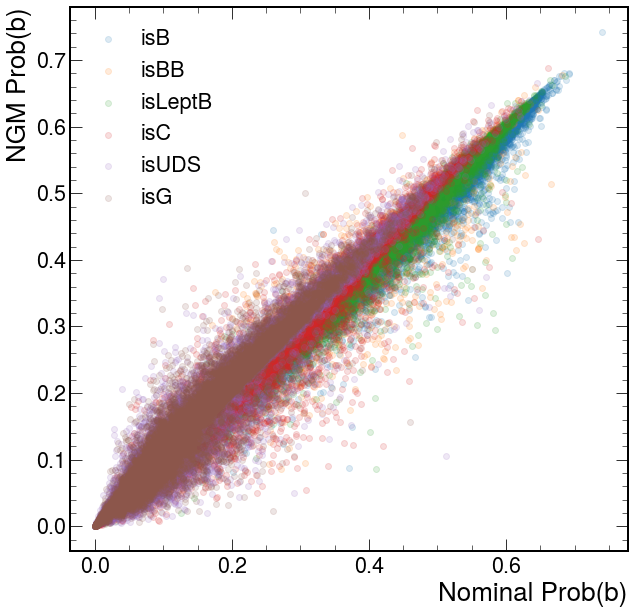

In [128]:
x_model = 'Nominal'
y_model = 'NGM'
output = 'b'
plt.figure(figsize=(10,10))
plt.scatter(df_nominal['prob_isB'][df_nominal['isB'] == 1], df_NGM['prob_isB'][df_NGM['isB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isB'][df_nominal['isBB'] == 1], df_NGM['prob_isB'][df_NGM['isBB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isB'][df_nominal['isLeptB'] == 1], df_NGM['prob_isB'][df_NGM['isLeptB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isB'][df_nominal['isC'] == 1], df_NGM['prob_isB'][df_NGM['isC'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isB'][df_nominal['isUDS'] == 1], df_NGM['prob_isB'][df_NGM['isUDS'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isB'][df_nominal['isG'] == 1], df_NGM['prob_isB'][df_NGM['isG'] == 1], alpha=0.15)
plt.legend(['isB','isBB','isLeptB','isC','isUDS','isG'])
plt.xlabel(f'{x_model} Prob({output})')
plt.ylabel(f'{y_model} Prob({output})')
#plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')
plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

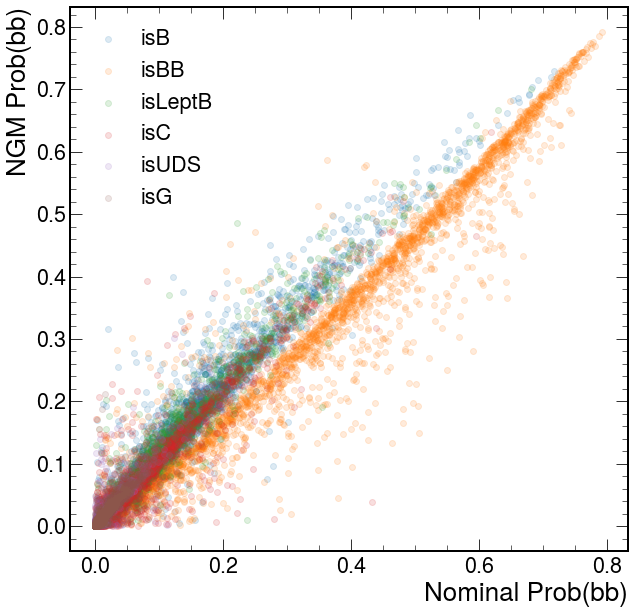

In [123]:
x_model = 'Nominal'
y_model = 'NGM'
output = 'bb'
plt.figure(figsize=(10,10))
plt.scatter(df_nominal['prob_isBB'][df_nominal['isB'] == 1], df_NGM['prob_isBB'][df_NGM['isB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isBB'][df_nominal['isBB'] == 1], df_NGM['prob_isBB'][df_NGM['isBB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isBB'][df_nominal['isLeptB'] == 1], df_NGM['prob_isBB'][df_NGM['isLeptB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isBB'][df_nominal['isC'] == 1], df_NGM['prob_isBB'][df_NGM['isC'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isBB'][df_nominal['isUDS'] == 1], df_NGM['prob_isBB'][df_NGM['isUDS'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isBB'][df_nominal['isG'] == 1], df_NGM['prob_isBB'][df_NGM['isG'] == 1], alpha=0.15)
plt.legend(['isB','isBB','isLeptB','isC','isUDS','isG'])
plt.xlabel(f'{x_model} Prob({output})')
plt.ylabel(f'{y_model} Prob({output})')
#plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')
plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

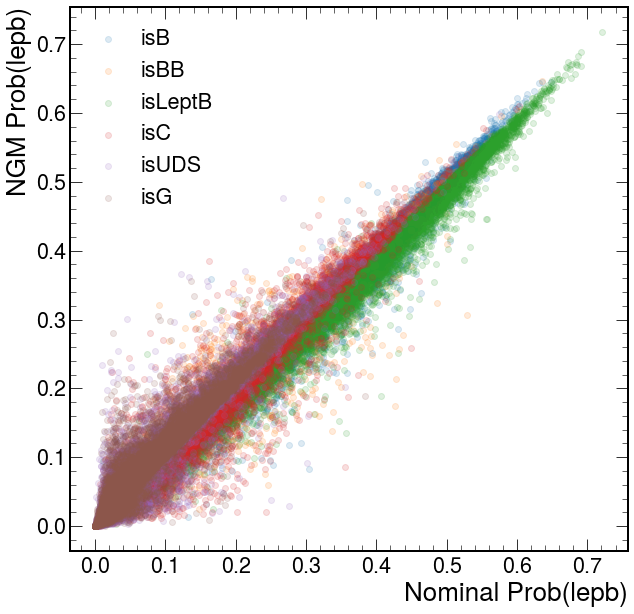

In [124]:
x_model = 'Nominal'
y_model = 'NGM'
output = 'lepb'
plt.figure(figsize=(10,10))
plt.scatter(df_nominal['prob_isLeptB'][df_nominal['isB'] == 1], df_NGM['prob_isLeptB'][df_NGM['isB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isLeptB'][df_nominal['isBB'] == 1], df_NGM['prob_isLeptB'][df_NGM['isBB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isLeptB'][df_nominal['isLeptB'] == 1], df_NGM['prob_isLeptB'][df_NGM['isLeptB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isLeptB'][df_nominal['isC'] == 1], df_NGM['prob_isLeptB'][df_NGM['isC'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isLeptB'][df_nominal['isUDS'] == 1], df_NGM['prob_isLeptB'][df_NGM['isUDS'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isLeptB'][df_nominal['isG'] == 1], df_NGM['prob_isLeptB'][df_NGM['isG'] == 1], alpha=0.15)
plt.legend(['isB','isBB','isLeptB','isC','isUDS','isG'])
plt.xlabel(f'{x_model} Prob({output})')
plt.ylabel(f'{y_model} Prob({output})')
#plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')
plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

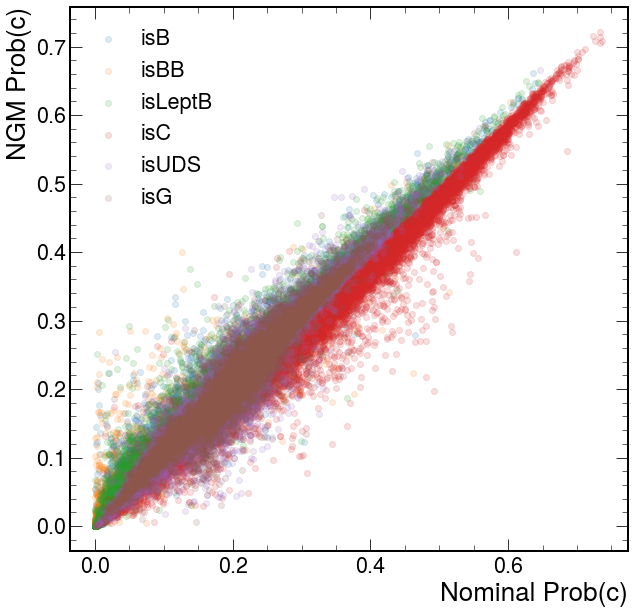

In [125]:
x_model = 'Nominal'
y_model = 'NGM'
output = 'c'
plt.figure(figsize=(10,10))
plt.scatter(df_nominal['prob_isC'][df_nominal['isB'] == 1], df_NGM['prob_isC'][df_NGM['isB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isC'][df_nominal['isBB'] == 1], df_NGM['prob_isC'][df_NGM['isBB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isC'][df_nominal['isLeptB'] == 1], df_NGM['prob_isC'][df_NGM['isLeptB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isC'][df_nominal['isC'] == 1], df_NGM['prob_isC'][df_NGM['isC'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isC'][df_nominal['isUDS'] == 1], df_NGM['prob_isC'][df_NGM['isUDS'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isC'][df_nominal['isG'] == 1], df_NGM['prob_isC'][df_NGM['isG'] == 1], alpha=0.15)
plt.legend(['isB','isBB','isLeptB','isC','isUDS','isG'])
plt.xlabel(f'{x_model} Prob({output})')
plt.ylabel(f'{y_model} Prob({output})')
#plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')
plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

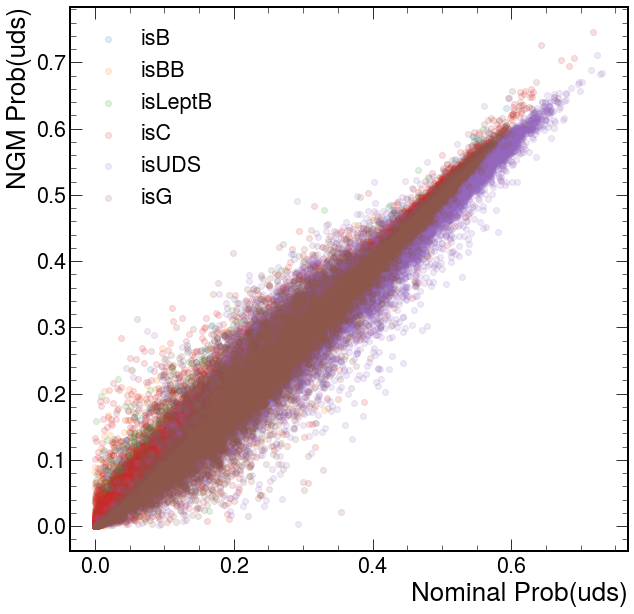

In [126]:
x_model = 'Nominal'
y_model = 'NGM'
output = 'uds'
plt.figure(figsize=(10,10))
plt.scatter(df_nominal['prob_isUDS'][df_nominal['isB'] == 1], df_NGM['prob_isUDS'][df_NGM['isB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isUDS'][df_nominal['isBB'] == 1], df_NGM['prob_isUDS'][df_NGM['isBB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isUDS'][df_nominal['isLeptB'] == 1], df_NGM['prob_isUDS'][df_NGM['isLeptB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isUDS'][df_nominal['isC'] == 1], df_NGM['prob_isUDS'][df_NGM['isC'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isUDS'][df_nominal['isUDS'] == 1], df_NGM['prob_isUDS'][df_NGM['isUDS'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isUDS'][df_nominal['isG'] == 1], df_NGM['prob_isUDS'][df_NGM['isG'] == 1], alpha=0.15)
plt.legend(['isB','isBB','isLeptB','isC','isUDS','isG'])
plt.xlabel(f'{x_model} Prob({output})')
plt.ylabel(f'{y_model} Prob({output})')
#plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')
plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

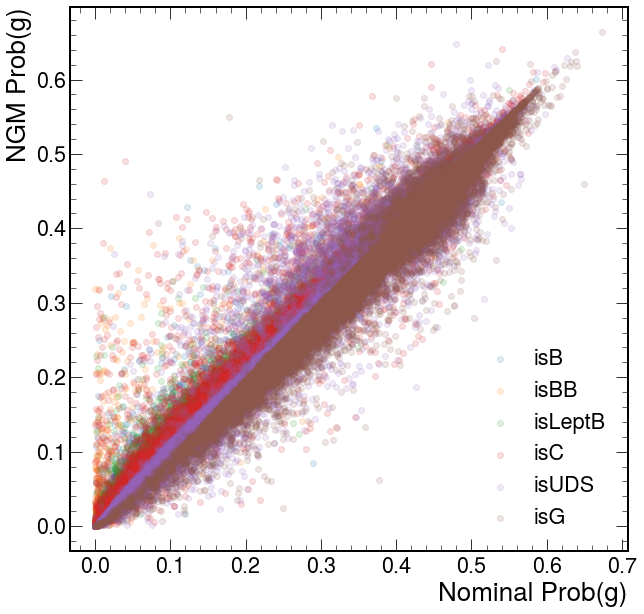

In [127]:
x_model = 'Nominal'
y_model = 'NGM'
output = 'g'
plt.figure(figsize=(10,10))
plt.scatter(df_nominal['prob_isG'][df_nominal['isB'] == 1], df_NGM['prob_isG'][df_NGM['isB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isG'][df_nominal['isBB'] == 1], df_NGM['prob_isG'][df_NGM['isBB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isG'][df_nominal['isLeptB'] == 1], df_NGM['prob_isG'][df_NGM['isLeptB'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isG'][df_nominal['isC'] == 1], df_NGM['prob_isG'][df_NGM['isC'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isG'][df_nominal['isUDS'] == 1], df_NGM['prob_isG'][df_NGM['isUDS'] == 1], alpha=0.15)
plt.scatter(df_nominal['prob_isG'][df_nominal['isG'] == 1], df_NGM['prob_isG'][df_NGM['isG'] == 1], alpha=0.15)
plt.legend(['isB','isBB','isLeptB','isC','isUDS','isG'])
plt.xlabel(f'{x_model} Prob({output})')
plt.ylabel(f'{y_model} Prob({output})')
#plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')
plt.savefig(output + '_' + x_model + '_' + y_model + '_20Epochs.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

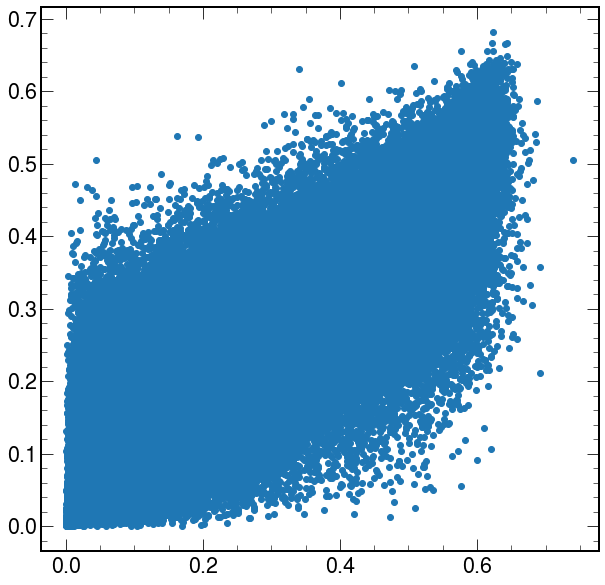

In [100]:
plt.scatter(df_nominal['prob_isB'], df_FGSM['prob_isB'])

In [101]:
up_ = npf[:,0,3] + np.abs(npf[:,0,3]) * 0.2
down_ = npf[:,0,3] - np.abs(npf[:,0,3]) * 0.2

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


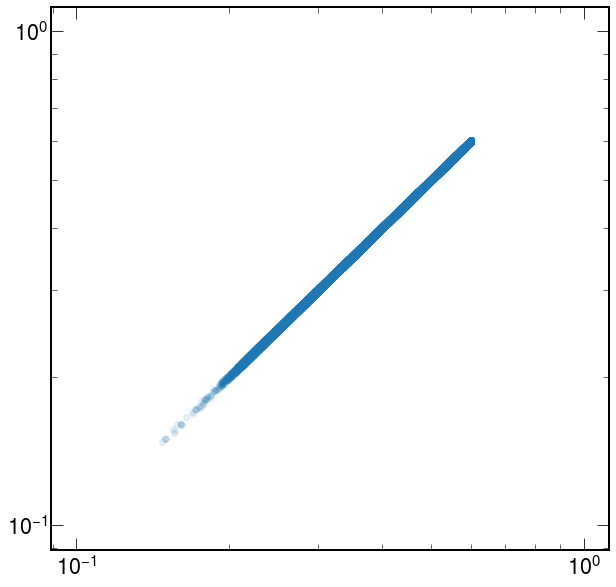

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(-npf[:,0,3], -npfNGM[:,0,3], alpha=0.1)
plt.yscale('log')
plt.xscale('log')
#plt.plot(npf[:,0,3], up_)
#plt.plot(npf[:,0,3], down_)

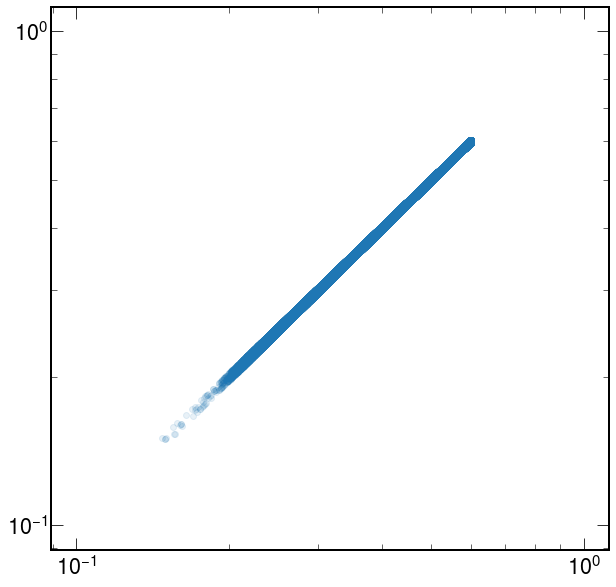

In [103]:
plt.figure(figsize=(10,10))
plt.scatter(-npf[:,0,3], -npfFGSM[:,0,3], alpha=0.1)
plt.yscale('log')
plt.xscale('log')
#plt.plot(npf[:,0,3], up_)
#plt.plot(npf[:,0,3], down_)

In [104]:
np.sum(npf[:,0,3] == npfNGM[:,0,3])

95061

In [47]:
min_, max_ = np.min((np.min(npf[:,0,3]), np.min(npfNGM[:,0,3]), np.min(npfFGSM[:,0,3]))), np.max((np.max(npf[:,0,3]), np.max(npfNGM[:,0,3]), np.max(npfFGSM[:,0,3])))

In [24]:
min_ttbar, max_ttbar = np.min((np.min(npfTTbarNOM[:,0,3]), np.min(npfTTbarNGM[:,0,3]))), np.max((np.max(npfTTbarNOM[:,0,3]), np.max(npfTTbarNGM[:,0,3])))

In [25]:
min_ttbarCPF, max_ttbarCPF = np.min((np.min(cpfTTbarNOM[:,0,5]), np.min(cpfTTbarNGM[:,0,5]))), np.max((np.max(cpfTTbarNOM[:,0,5]), np.max(cpfTTbarNGM[:,0,5])))

(array([8.430e+02, 2.206e+03, 2.498e+03, 2.519e+03, 2.342e+03, 2.087e+03,
        1.984e+03, 1.592e+03, 1.407e+03, 1.175e+03, 1.039e+03, 8.550e+02,
        7.780e+02, 6.820e+02, 6.290e+02, 5.530e+02, 4.330e+02, 4.520e+02,
        3.910e+02, 3.480e+02, 3.080e+02, 2.710e+02, 2.510e+02, 2.370e+02,
        2.060e+02, 1.970e+02, 1.830e+02, 1.590e+02, 1.360e+02, 1.260e+02,
        1.070e+02, 1.240e+02, 1.100e+02, 1.060e+02, 8.000e+01, 8.800e+01,
        5.300e+01, 5.400e+01, 3.700e+01, 1.900e+01, 4.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.660e+02]),
 array([-0.60295916, -0.5929098 , -0.5828605 , -0.5728112 , -0.5627619 ,
        -0.55271256, -0.5426632 , -0.53261393, -0.5225646 , -0.5125153 ,
        -0.50246596, -0.49241665, -0.48236734, -0.472318  , -0.46226868,
        -0.45221937, -0.44217005, -0.43

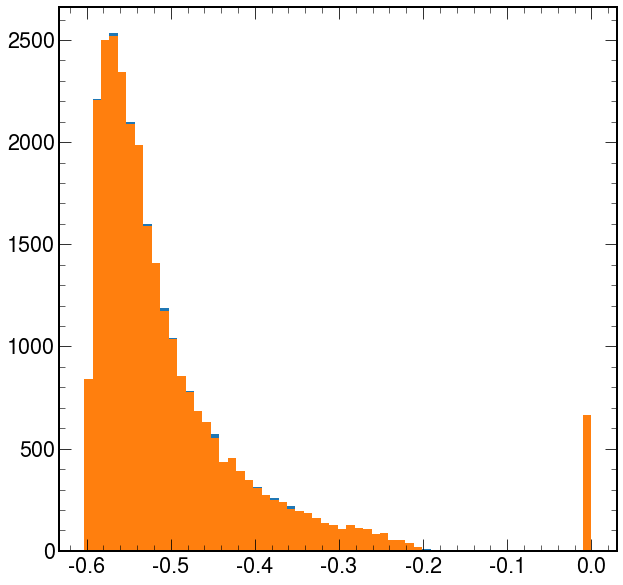

In [48]:
plt.hist(npf[:,0,3][df_nominal['isB'] == 1], range=(min_, max_), bins=60)
plt.hist(npfNGM[:,0,3][df_nominal['isB'] == 1], range=(min_, max_), bins=60)

(array([151., 343., 348., 334., 283., 233., 209., 185., 174., 147., 155.,
        131., 113.,  93.,  98.,  77.,  88.,  64.,  57.,  46.,  52.,  43.,
         49.,  39.,  40.,  40.,  27.,  20.,  18.,  21.,  16.,  18.,  23.,
         10.,  18.,  11.,  11.,  11.,   4.,   7.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  31.]),
 array([-0.60295916, -0.5929098 , -0.5828605 , -0.5728112 , -0.5627619 ,
        -0.55271256, -0.5426632 , -0.53261393, -0.5225646 , -0.5125153 ,
        -0.50246596, -0.49241665, -0.48236734, -0.472318  , -0.46226868,
        -0.45221937, -0.44217005, -0.43212074, -0.4220714 , -0.41202208,
        -0.40197277, -0.39192346, -0.38187414, -0.3718248 , -0.3617755 ,
        -0.35172617, -0.34167686, -0.33162755, -0.3215782 , -0.3115289 ,
        -0.30147958, -0.29143026, -0.28138095, -0.2713316 , -0.2612823 ,
        -0.25123298, -0.24118367, -0.23113434, -0.22108503, -0.2110357 ,
      

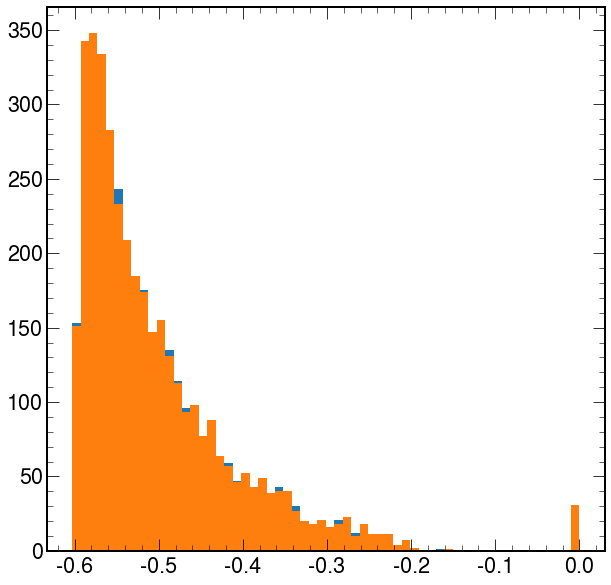

In [49]:
plt.hist(npf[:,0,3][df_nominal['isBB'] == 1], range=(min_, max_), bins=60)
plt.hist(npfNGM[:,0,3][df_nominal['isBB'] == 1], range=(min_, max_), bins=60)

(array([4.940e+02, 1.220e+03, 1.391e+03, 1.417e+03, 1.350e+03, 1.225e+03,
        1.061e+03, 9.360e+02, 8.190e+02, 7.200e+02, 5.640e+02, 5.820e+02,
        4.490e+02, 4.000e+02, 3.570e+02, 3.380e+02, 2.770e+02, 2.520e+02,
        2.380e+02, 2.220e+02, 1.860e+02, 1.720e+02, 1.490e+02, 1.590e+02,
        1.440e+02, 1.250e+02, 1.050e+02, 1.090e+02, 9.600e+01, 1.200e+02,
        8.900e+01, 7.900e+01, 8.200e+01, 7.900e+01, 6.000e+01, 6.200e+01,
        4.700e+01, 5.100e+01, 3.100e+01, 1.100e+01, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.540e+02]),
 array([-0.60295916, -0.5929098 , -0.5828605 , -0.5728112 , -0.5627619 ,
        -0.55271256, -0.5426632 , -0.53261393, -0.5225646 , -0.5125153 ,
        -0.50246596, -0.49241665, -0.48236734, -0.472318  , -0.46226868,
        -0.45221937, -0.44217005, -0.43

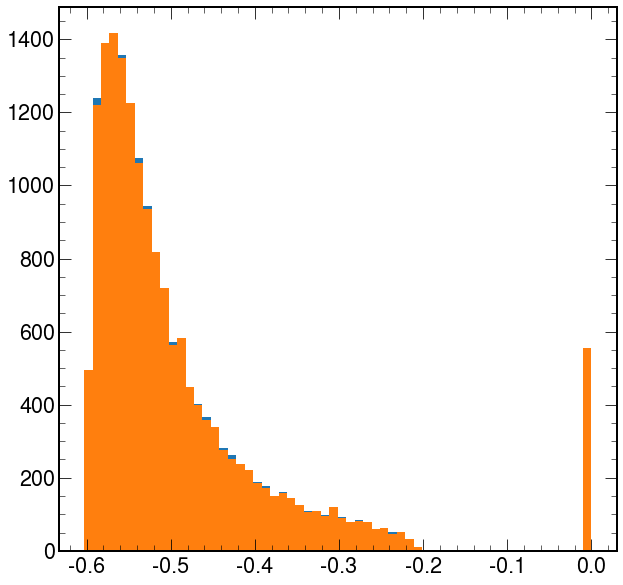

In [50]:
plt.hist(npf[:,0,3][df_nominal['isLeptB'] == 1], range=(min_, max_), bins=60)
plt.hist(npfNGM[:,0,3][df_nominal['isLeptB'] == 1], range=(min_, max_), bins=60)

(array([2.283e+03, 4.577e+03, 3.860e+03, 3.569e+03, 2.999e+03, 2.636e+03,
        2.372e+03, 2.141e+03, 1.865e+03, 1.616e+03, 1.530e+03, 1.286e+03,
        1.142e+03, 1.041e+03, 9.290e+02, 8.620e+02, 7.910e+02, 7.060e+02,
        6.660e+02, 6.110e+02, 5.830e+02, 5.330e+02, 4.710e+02, 4.750e+02,
        4.370e+02, 4.140e+02, 3.750e+02, 3.840e+02, 3.450e+02, 3.610e+02,
        3.000e+02, 2.570e+02, 2.520e+02, 2.470e+02, 2.230e+02, 1.930e+02,
        1.600e+02, 1.370e+02, 9.000e+01, 5.000e+01, 8.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.083e+03]),
 array([-0.60295916, -0.5929098 , -0.5828605 , -0.5728112 , -0.5627619 ,
        -0.55271256, -0.5426632 , -0.53261393, -0.5225646 , -0.5125153 ,
        -0.50246596, -0.49241665, -0.48236734, -0.472318  , -0.46226868,
        -0.45221937, -0.44217005, -0.43

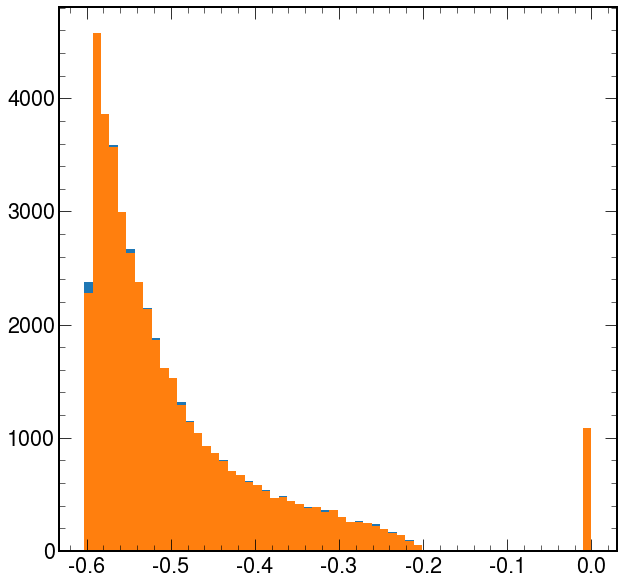

In [51]:
plt.hist(npf[:,0,3][df_nominal['isC'] == 1], range=(min_, max_), bins=60)
plt.hist(npfNGM[:,0,3][df_nominal['isC'] == 1], range=(min_, max_), bins=60)

(array([1.9673e+04, 2.0259e+04, 1.2776e+04, 9.3210e+03, 7.6200e+03,
        6.4670e+03, 5.5840e+03, 4.7930e+03, 4.2960e+03, 3.7540e+03,
        3.2530e+03, 2.8920e+03, 2.6120e+03, 2.4040e+03, 2.1870e+03,
        1.9320e+03, 1.7970e+03, 1.6810e+03, 1.5570e+03, 1.4790e+03,
        1.3550e+03, 1.3210e+03, 1.2980e+03, 1.2080e+03, 1.1500e+03,
        1.1140e+03, 1.0680e+03, 9.7800e+02, 9.2800e+02, 9.2400e+02,
        9.0500e+02, 8.5600e+02, 7.6200e+02, 7.4000e+02, 6.5400e+02,
        6.1600e+02, 5.4800e+02, 4.5900e+02, 3.4800e+02, 1.9100e+02,
        2.5000e+01, 3.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2830e+03]),
 array([-0.60295916, -0.5929098 , -0.5828605 , -0.5728112 , -0.5627619 ,
        -0.55271256, -0.5426632 , -0.53261393, -0.5225646 , -0.5125153 ,
        -0.50246596, -0.49241665, -0

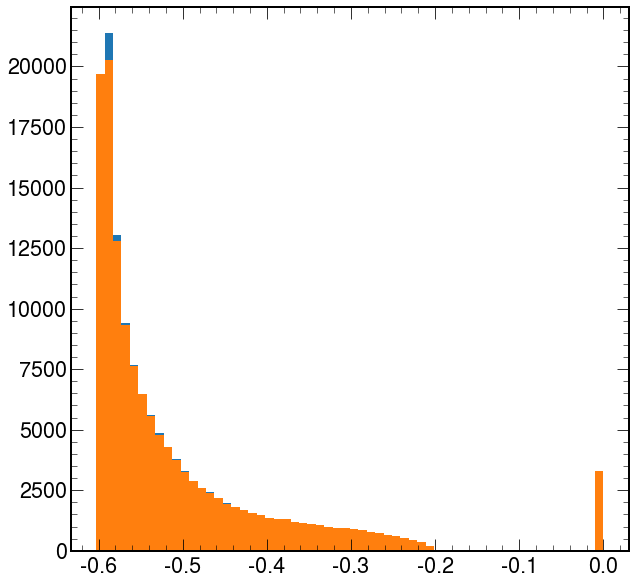

In [52]:
plt.hist(npf[:,0,3][df_nominal['isUDS'] == 1], range=(min_, max_), bins=60)
plt.hist(npfNGM[:,0,3][df_nominal['isUDS'] == 1], range=(min_, max_), bins=60)

(array([4.5380e+03, 1.0024e+04, 9.4860e+03, 8.7140e+03, 8.3570e+03,
        7.6090e+03, 7.3680e+03, 7.0420e+03, 6.2590e+03, 5.9830e+03,
        5.3550e+03, 4.9400e+03, 4.6910e+03, 4.3940e+03, 4.0620e+03,
        3.8260e+03, 3.5460e+03, 3.3160e+03, 2.9770e+03, 2.8060e+03,
        2.8060e+03, 2.6510e+03, 2.4480e+03, 2.3290e+03, 2.1830e+03,
        2.0840e+03, 1.9700e+03, 1.8660e+03, 1.8580e+03, 1.6320e+03,
        1.5980e+03, 1.5470e+03, 1.3740e+03, 1.2470e+03, 1.1680e+03,
        1.0000e+03, 7.5700e+02, 6.3600e+02, 4.4300e+02, 1.7800e+02,
        4.9000e+01, 9.0000e+00, 9.0000e+00, 1.0000e+00, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.7440e+03]),
 array([-0.60295916, -0.5929098 , -0.5828605 , -0.5728112 , -0.5627619 ,
        -0.55271256, -0.5426632 , -0.53261393, -0.5225646 , -0.5125153 ,
        -0.50246596, -0.49241665, -0

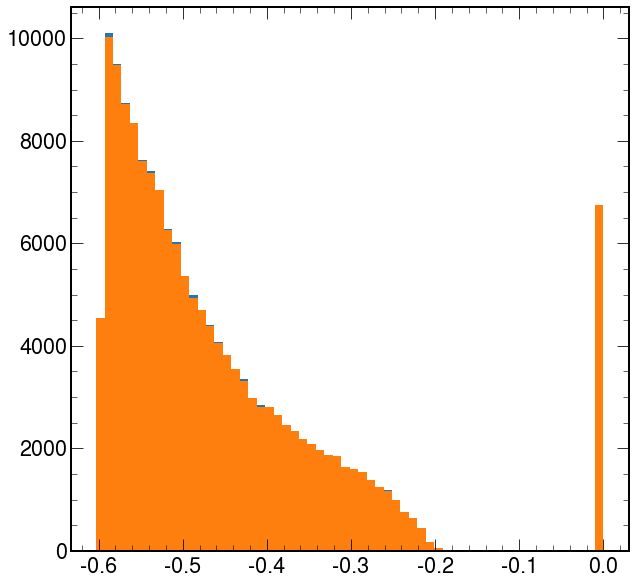

In [53]:
plt.hist(npf[:,0,3][df_nominal['isG'] == 1], range=(min_, max_), bins=60)
plt.hist(npfNGM[:,0,3][df_nominal['isG'] == 1], range=(min_, max_), bins=60)

In [54]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown', 'tab:purple']

In [55]:
names = ['isB',
         'isBB',
         'isLeptB',
         'isC',
         'isUDS',
         'isG']

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


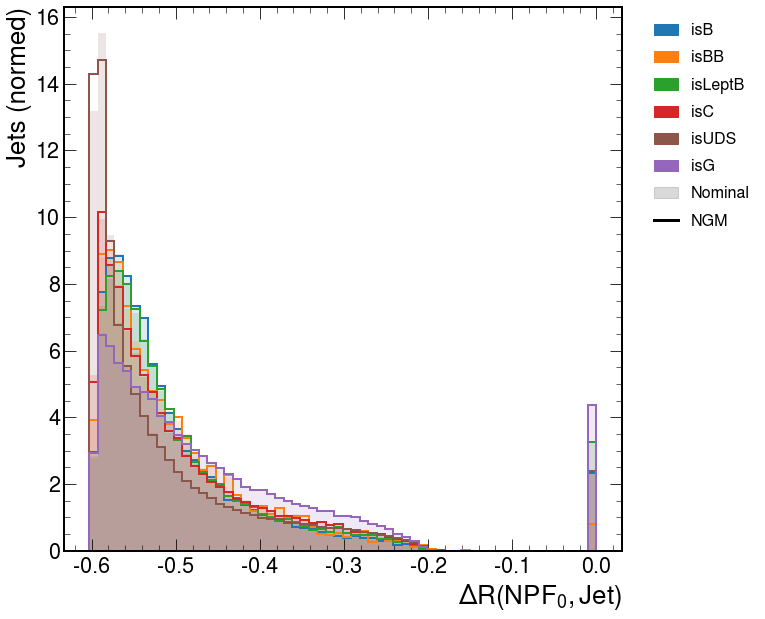

In [56]:
x_model = 'Nominal'
y_model = 'NGM'
input_ = r'$\Delta R(NPF_0, Jet)$'



plt.figure(figsize=(10,10))

plt.hist(npf[:,0,3][df_nominal['isB'] == 1], range=(min_, max_), bins=60, color=colors[0], alpha=0.15, density=True)
plt.hist(npfNGM[:,0,3][df_nominal['isB'] == 1], range=(min_, max_), bins=60, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isBB'] == 1], range=(min_, max_), bins=60, color=colors[1], alpha=0.15, density=True)
plt.hist(npfNGM[:,0,3][df_nominal['isBB'] == 1], range=(min_, max_), bins=60, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isLeptB'] == 1], range=(min_, max_), bins=60, color=colors[2], alpha=0.15, density=True)
plt.hist(npfNGM[:,0,3][df_nominal['isLeptB'] == 1], range=(min_, max_), bins=60, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isC'] == 1], range=(min_, max_), bins=60, color=colors[3], alpha=0.15, density=True)
plt.hist(npfNGM[:,0,3][df_nominal['isC'] == 1], range=(min_, max_), bins=60, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isUDS'] == 1], range=(min_, max_), bins=60, color=colors[4], alpha=0.15, density=True)
plt.hist(npfNGM[:,0,3][df_nominal['isUDS'] == 1], range=(min_, max_), bins=60, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isG'] == 1], range=(min_, max_), bins=60, color=colors[5], alpha=0.15, density=True)
plt.hist(npfNGM[:,0,3][df_nominal['isG'] == 1], range=(min_, max_), bins=60, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


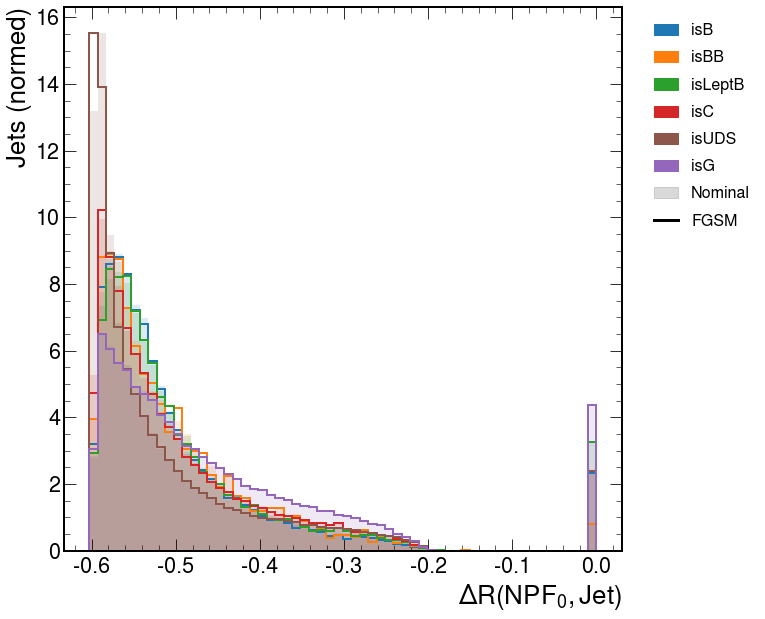

In [57]:
x_model = 'Nominal'
y_model = 'FGSM'
input_ = r'$\Delta R(NPF_0, Jet)$'



plt.figure(figsize=(10,10))

plt.hist(npf[:,0,3][df_nominal['isB'] == 1], range=(min_, max_), bins=60, color=colors[0], alpha=0.15, density=True)
plt.hist(npfFGSM[:,0,3][df_nominal['isB'] == 1], range=(min_, max_), bins=60, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isBB'] == 1], range=(min_, max_), bins=60, color=colors[1], alpha=0.15, density=True)
plt.hist(npfFGSM[:,0,3][df_nominal['isBB'] == 1], range=(min_, max_), bins=60, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isLeptB'] == 1], range=(min_, max_), bins=60, color=colors[2], alpha=0.15, density=True)
plt.hist(npfFGSM[:,0,3][df_nominal['isLeptB'] == 1], range=(min_, max_), bins=60, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isC'] == 1], range=(min_, max_), bins=60, color=colors[3], alpha=0.15, density=True)
plt.hist(npfFGSM[:,0,3][df_nominal['isC'] == 1], range=(min_, max_), bins=60, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isUDS'] == 1], range=(min_, max_), bins=60, color=colors[4], alpha=0.15, density=True)
plt.hist(npfFGSM[:,0,3][df_nominal['isUDS'] == 1], range=(min_, max_), bins=60, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(npf[:,0,3][df_nominal['isG'] == 1], range=(min_, max_), bins=60, color=colors[5], alpha=0.15, density=True)
plt.hist(npfFGSM[:,0,3][df_nominal['isG'] == 1], range=(min_, max_), bins=60, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

In [58]:
pred_columns = [x for x in df_nominal.columns if 'prob' in x]

In [59]:
correlations_nominal = df_nominal[pred_columns].corr()

In [60]:
correlations_nominal

prob_isB  prob_isBB  prob_isLeptB  prob_isC  prob_isUDS  \
prob_isB      1.000000   0.277122      0.895600 -0.262443   -0.799814   
prob_isBB     0.277122   1.000000      0.239578 -0.225495   -0.310131   
prob_isLeptB  0.895600   0.239578      1.000000 -0.287134   -0.730058   
prob_isC     -0.262443  -0.225495     -0.287134  1.000000    0.040093   
prob_isUDS   -0.799814  -0.310131     -0.730058  0.040093    1.000000   
prob_isG     -0.752377  -0.295367     -0.781009 -0.016641    0.371032   

              prob_isG  
prob_isB     -0.752377  
prob_isBB    -0.295367  
prob_isLeptB -0.781009  
prob_isC     -0.016641  
prob_isUDS    0.371032  
prob_isG      1.000000

## TTbar

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


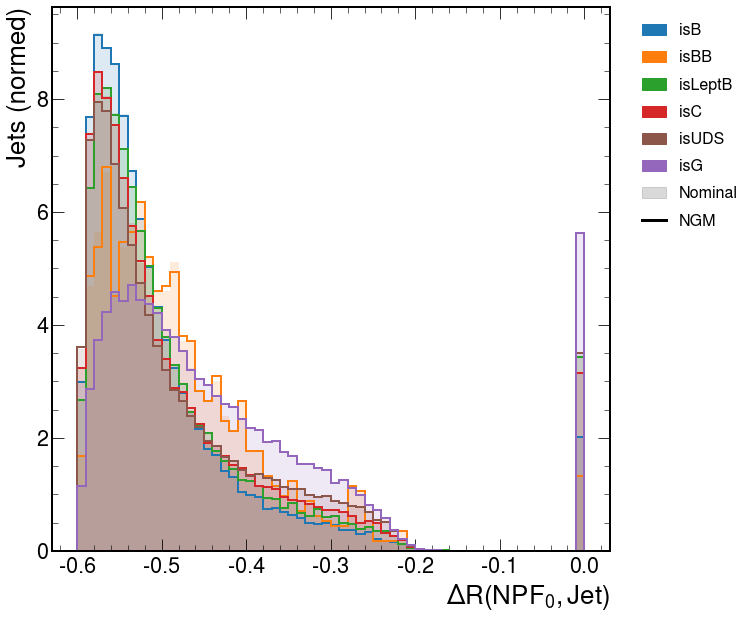

In [61]:
x_model = 'Nominal'
y_model = 'NGM'
input_ttbar_had = r'$\Delta R(NPF_0, Jet)$'



plt.figure(figsize=(10,10))

plt.hist(npfTTbarNOM[:,0,3][df_ttbar_nominal['isB'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[0], alpha=0.15, density=True)
plt.hist(npfTTbarNGM[:,0,3][df_ttbar_nominal['isB'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(npfTTbarNOM[:,0,3][df_ttbar_nominal['isBB'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[1], alpha=0.15, density=True)
plt.hist(npfTTbarNGM[:,0,3][df_ttbar_nominal['isBB'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(npfTTbarNOM[:,0,3][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[2], alpha=0.15, density=True)
plt.hist(npfTTbarNGM[:,0,3][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(npfTTbarNOM[:,0,3][df_ttbar_nominal['isC'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[3], alpha=0.15, density=True)
plt.hist(npfTTbarNGM[:,0,3][df_ttbar_nominal['isC'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(npfTTbarNOM[:,0,3][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[4], alpha=0.15, density=True)
plt.hist(npfTTbarNGM[:,0,3][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(npfTTbarNOM[:,0,3][df_ttbar_nominal['isG'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[5], alpha=0.15, density=True)
plt.hist(npfTTbarNGM[:,0,3][df_ttbar_nominal['isG'] == 1], range=(min_ttbar, max_ttbar), bins=60, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ttbar_had + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


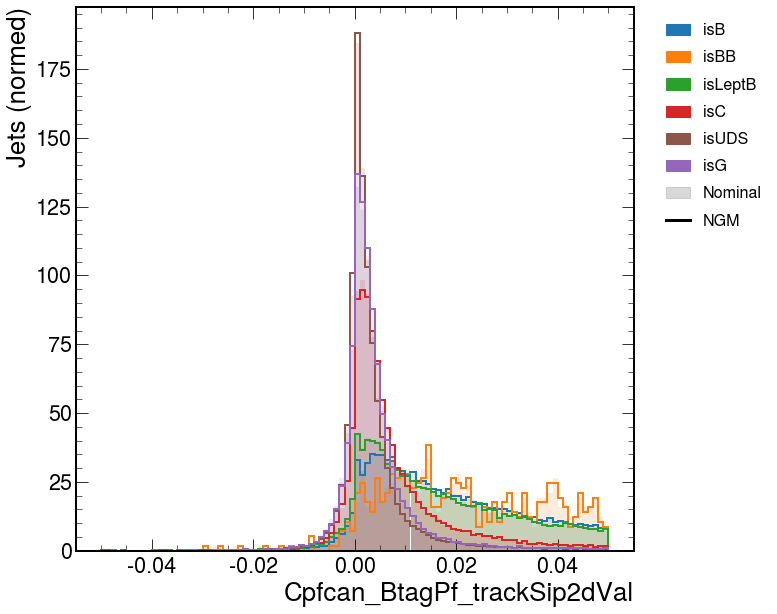

In [69]:
x_model = 'Nominal'
y_model = 'NGM'
input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal'

min_ttbarCPF, max_ttbarCPF = -0.05, 0.05

plt.figure(figsize=(10,10))

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,1,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,1,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,1,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,1,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,1,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,1,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_ttbar_had}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ttbar_had + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


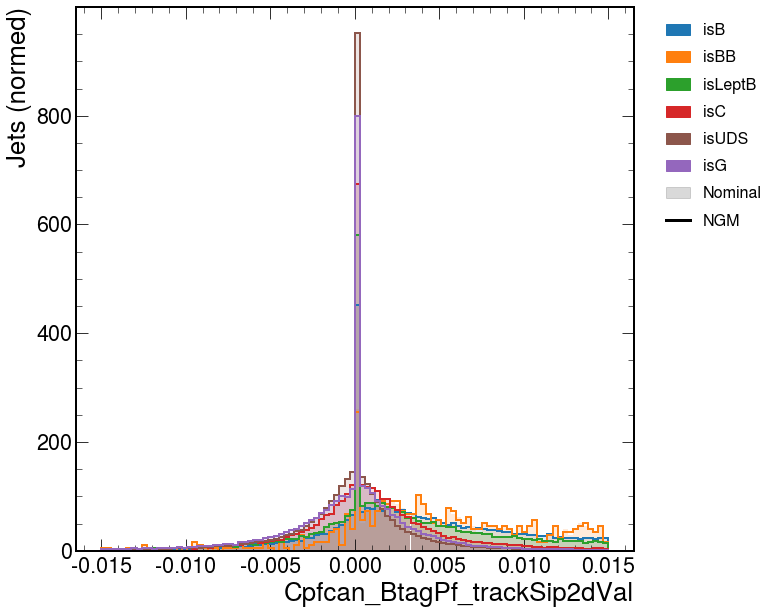

In [63]:
x_model = 'Nominal'
y_model = 'NGM'
input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal'

min_ttbarCPF, max_ttbarCPF = -0.015, 0.015

plt.figure(figsize=(10,10))

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_ttbar_had}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ttbar_had + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


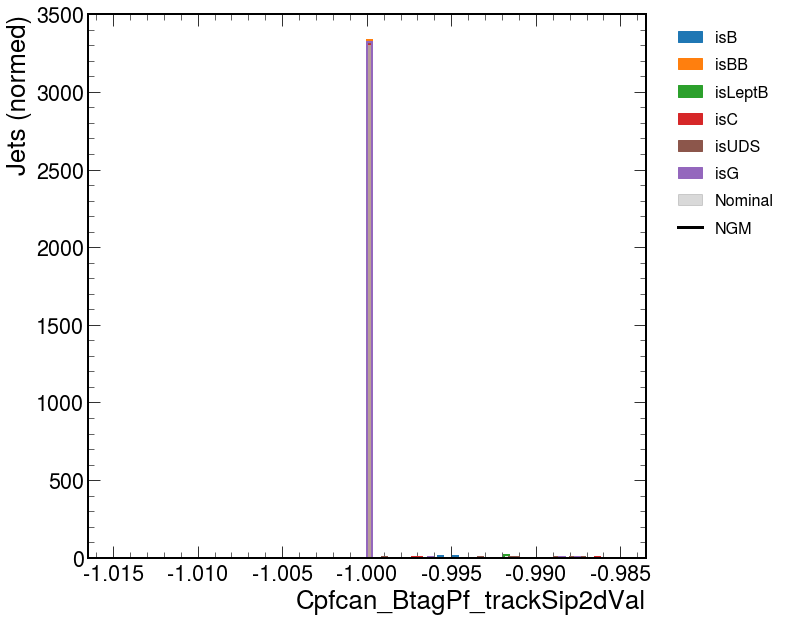

In [64]:
x_model = 'Nominal'
y_model = 'NGM'
input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal'

min_ttbarCPF, max_ttbarCPF = -1.015, -0.985

plt.figure(figsize=(10,10))

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], alpha=0.15, density=True)
plt.hist(cpfTTbarNGM[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_ttbar_had}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ttbar_had + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


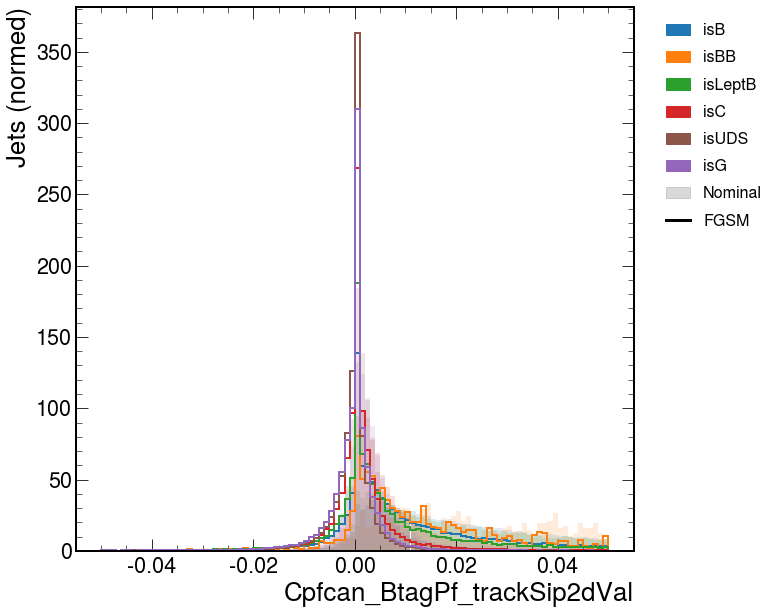

In [68]:
x_model = 'Nominal'
y_model = 'FGSM'
input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal'

min_ttbarCPF, max_ttbarCPF = -0.05, 0.05

plt.figure(figsize=(10,10))

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,1,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_ttbar_had}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ttbar_had + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


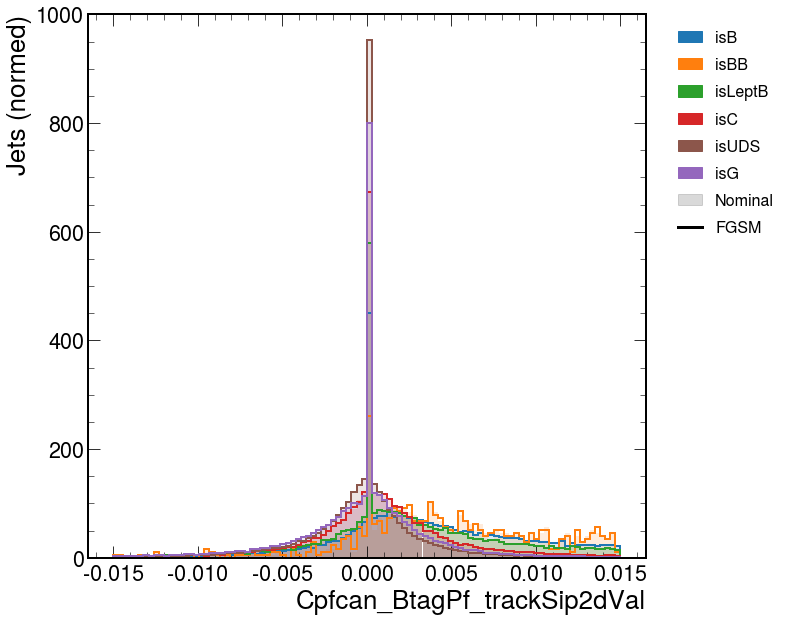

In [65]:
x_model = 'Nominal'
y_model = 'FGSM'
input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal'

min_ttbarCPF, max_ttbarCPF = -0.015, 0.015

plt.figure(figsize=(10,10))

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_ttbar_had}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ttbar_had + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


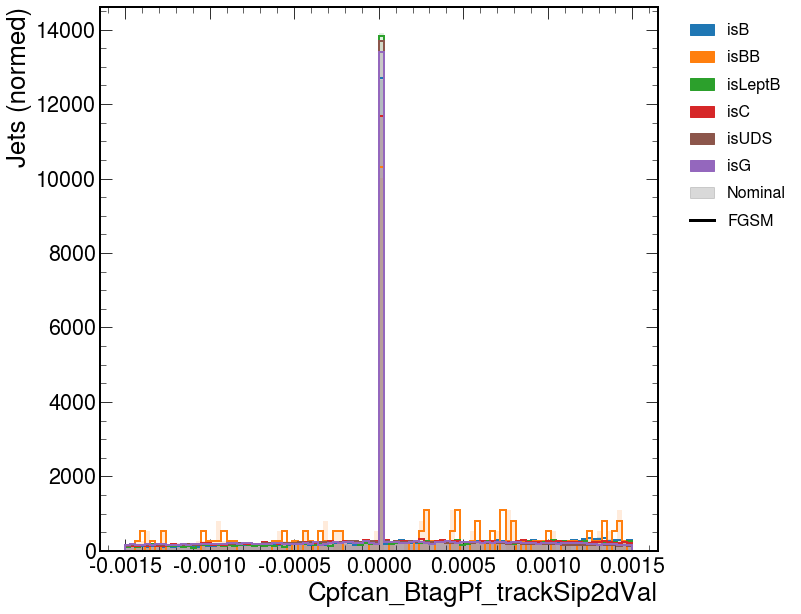

In [66]:
x_model = 'Nominal'
y_model = 'FGSM'
input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal'

min_ttbarCPF, max_ttbarCPF = -0.0015, 0.0015

plt.figure(figsize=(10,10))

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[0], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isBB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[1], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isLeptB'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[2], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isC'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[3], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isUDS'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[4], histtype='step', linewidth=2, density=True)

plt.hist(cpfTTbarNOM[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], alpha=0.15, density=True)
plt.hist(cpfTTbarFGSMnonrestricted[:,3,5][df_ttbar_nominal['isG'] == 1], range=(min_ttbarCPF, max_ttbarCPF), bins=100, color=colors[5], histtype='step', linewidth=2, density=True)

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')
#plt.legend([f'{x_model} isB',
#            f'{x_model} isBB',
#            f'{x_model} isLeptB',
#            f'{x_model} isC',
#            f'{x_model} isUDS',
#            f'{x_model} isG',
#            f'{y_model} isB',
#            f'{y_model} isBB',
#            f'{y_model} isLeptB',
#            f'{y_model} isC',
#            f'{y_model} isUDS',
#            f'{y_model} isG'])
plt.xlabel(f'{input_ttbar_had}')
plt.ylabel(f'Jets (normed)')
plt.savefig(input_ttbar_had + '_' + x_model + '_' + y_model + '_20Epochs.pdf', bbox_inches='tight')

(-0.001, 0.001)

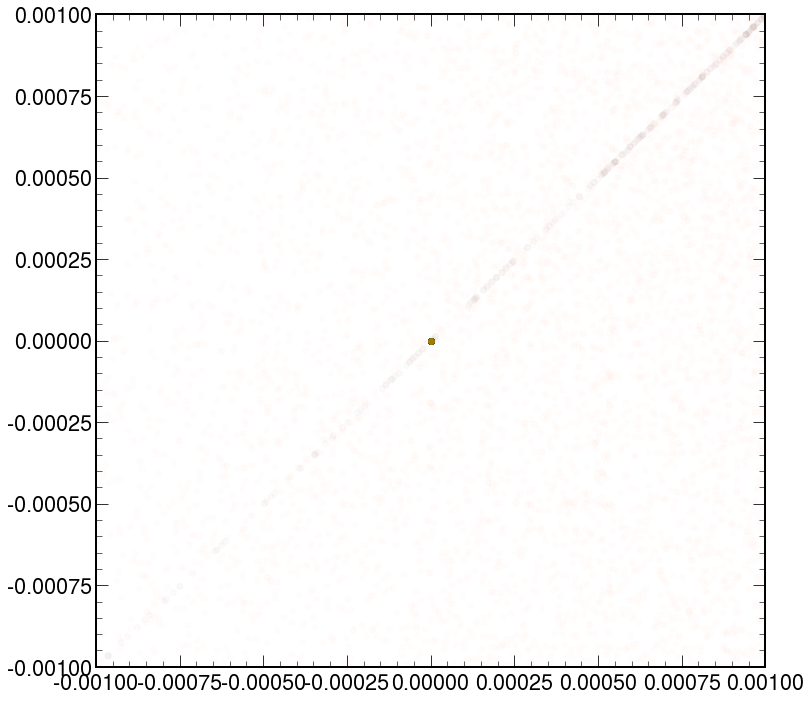

In [94]:
plt.figure(figsize=(12,12))
plt.scatter(cpfTTbarNOM[:,0,5], cpfTTbarFGSMnonrestricted[:,0,5], alpha=0.01)
plt.scatter(cpfTTbarNOM[:,0,5], cpfTTbarNGM[:,0,5], alpha=0.01)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)

<ipython-input-112-4956658d765b>:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(input_ttbar_had + '_FGSMversusNGM' + '_correlations' + '_20Epochs.pdf', bbox_inches='tight')
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


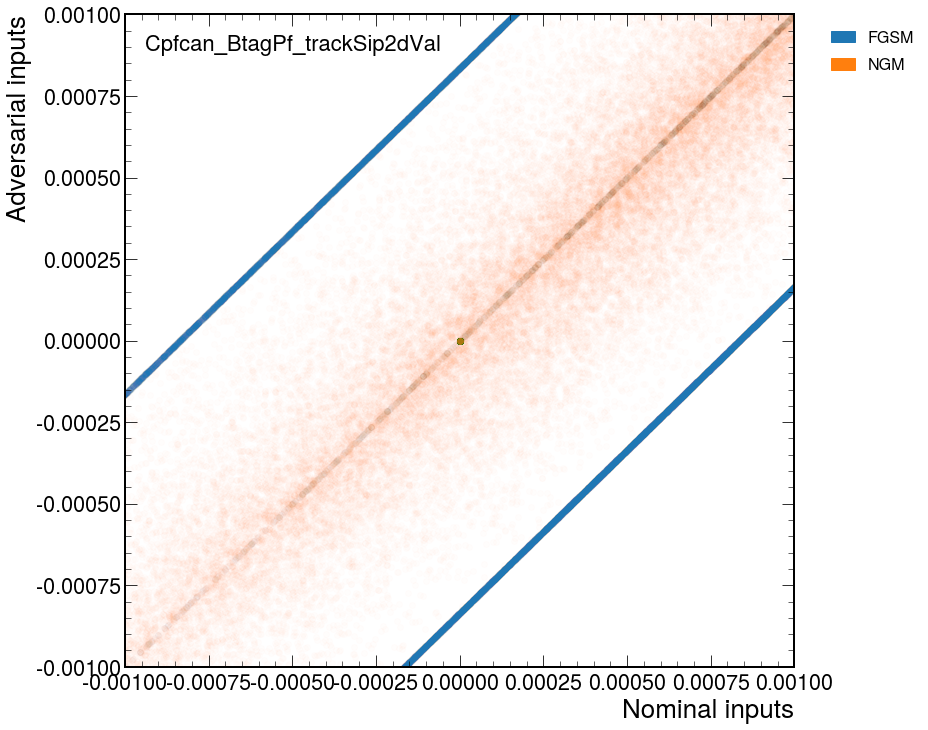

In [112]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(cpfTTbarNOM[:,1,5], cpfTTbarFGSMnonrestricted[:,1,5], alpha=0.01)
plt.scatter(cpfTTbarNOM[:,1,5], cpfTTbarNGM[:,1,5], alpha=0.01)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)

input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal'
plt.xlabel('Nominal inputs')
plt.ylabel('Adversarial inputs')

handles = []
handles.append(mpatches.Patch(color='tab:blue', label='FGSM'))
handles.append(mpatches.Patch(color='tab:orange', label='NGM'))
#handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
#handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
#plt.text(input_ttbar_had)
at = AnchoredText(input_ttbar_had,
                      loc='upper left',frameon=False, prop=dict(size=22),
                      #bbox_to_anchor=(1., 0.9),
                      #bbox_transform=ax1.transAxes
                     )
ax.add_artist(at)
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')

plt.savefig(input_ttbar_had + '_FGSMversusNGM' + '_correlations' + '_20Epochs.pdf', bbox_inches='tight')

(-0.001, 0.001)

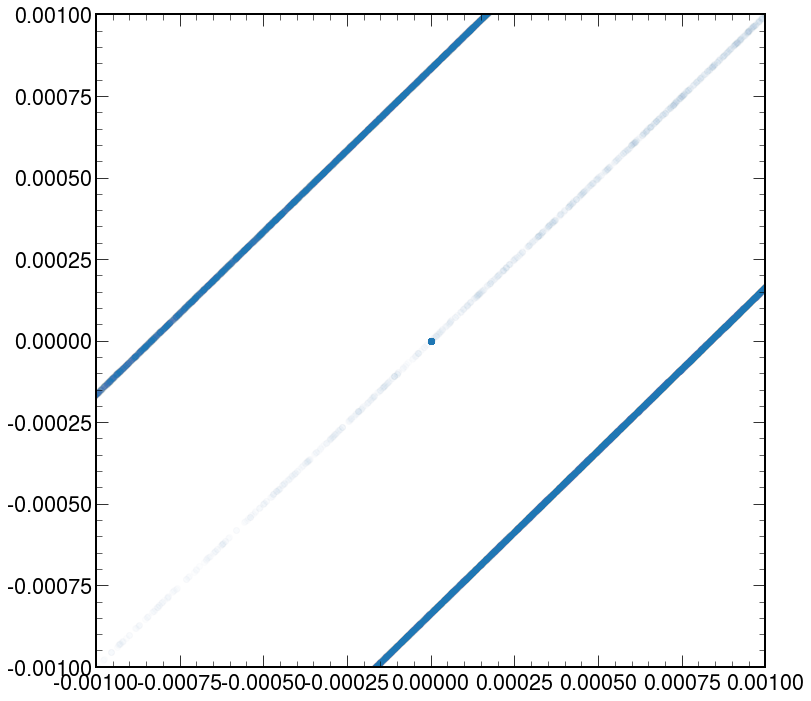

In [96]:
plt.figure(figsize=(12,12))
plt.scatter(cpfTTbarNOM[:,1,5], cpfTTbarFGSMnonrestricted[:,1,5], alpha=0.01)
#plt.scatter(cpfTTbarNOM[:,1,5], cpfTTbarNGM[:,1,5], alpha=0.01)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)

(-0.001, 0.001)

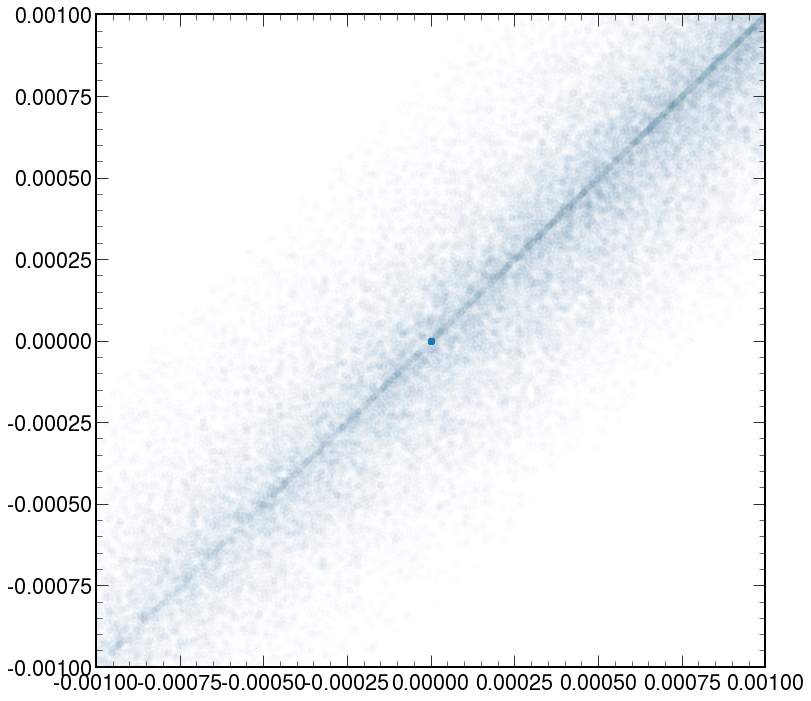

In [97]:
plt.figure(figsize=(12,12))
#plt.scatter(cpfTTbarNOM[:,1,5], cpfTTbarFGSMnonrestricted[:,1,5], alpha=0.01)
plt.scatter(cpfTTbarNOM[:,1,5], cpfTTbarNGM[:,1,5], alpha=0.01)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)

<ipython-input-109-2c5f633add7c>:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(input_ttbar_had + '_' + attack+ '_correlations' + '_20Epochs.pdf', bbox_inches='tight')
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/afs/cern.ch/work/a/anstein/miniconda3/envs/my-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


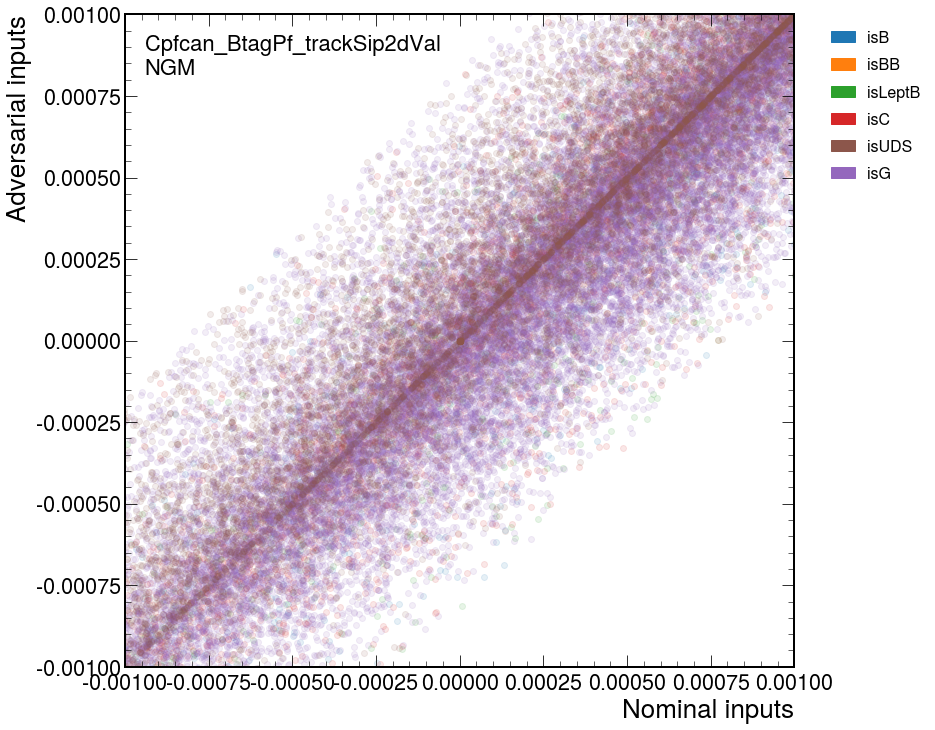

In [109]:
fig, ax = plt.subplots(figsize=(12,12))
#plt.scatter(cpfTTbarNOM[:,1,5], cpfTTbarFGSMnonrestricted[:,1,5], alpha=0.01)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isB'] == 1][:,1,5], cpfTTbarNGM[df_ttbar_nominal['isB'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isBB'] == 1][:,1,5], cpfTTbarNGM[df_ttbar_nominal['isBB'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isLeptB'] == 1][:,1,5], cpfTTbarNGM[df_ttbar_nominal['isLeptB'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isC'] == 1][:,1,5], cpfTTbarNGM[df_ttbar_nominal['isC'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isUDS'] == 1][:,1,5], cpfTTbarNGM[df_ttbar_nominal['isUDS'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isG'] == 1][:,1,5], cpfTTbarNGM[df_ttbar_nominal['isG'] == 1][:,1,5], alpha=0.11)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)

attack = 'NGM'
input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal' + '\n' + attack
plt.xlabel('Nominal inputs')
plt.ylabel('Adversarial inputs')

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

#handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
#handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
#plt.text(input_ttbar_had)
at = AnchoredText(input_ttbar_had,
                      loc='upper left',frameon=False, prop=dict(size=22),
                      #bbox_to_anchor=(1., 0.9),
                      #bbox_transform=ax1.transAxes
                     )
ax.add_artist(at)
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')

plt.savefig(input_ttbar_had + '_' + attack+ '_correlations' + '_20Epochs.pdf', bbox_inches='tight')

<ipython-input-111-ee33e7672b13>:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(input_ttbar_had + '_' + attack + '_correlations' + '_20Epochs.pdf', bbox_inches='tight')
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/afs/cern.ch/work/a/anstein/miniconda3/envs/my-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


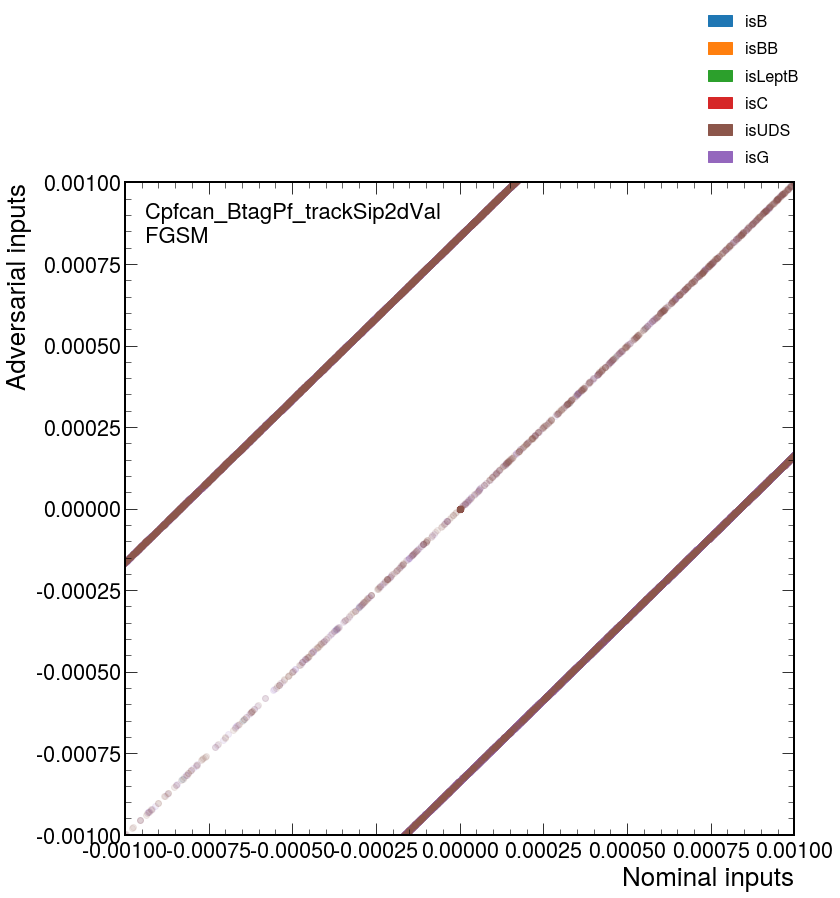

In [111]:
fig, ax = plt.subplots(figsize=(12,12))
#plt.scatter(cpfTTbarNOM[:,1,5], cpfTTbarFGSMnonrestricted[:,1,5], alpha=0.01)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isB'] == 1][:,1,5], cpfTTbarFGSMnonrestricted[df_ttbar_nominal['isB'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isBB'] == 1][:,1,5], cpfTTbarFGSMnonrestricted[df_ttbar_nominal['isBB'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isLeptB'] == 1][:,1,5], cpfTTbarFGSMnonrestricted[df_ttbar_nominal['isLeptB'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isC'] == 1][:,1,5], cpfTTbarFGSMnonrestricted[df_ttbar_nominal['isC'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isUDS'] == 1][:,1,5], cpfTTbarFGSMnonrestricted[df_ttbar_nominal['isUDS'] == 1][:,1,5], alpha=0.11)
plt.scatter(cpfTTbarNOM[df_ttbar_nominal['isG'] == 1][:,1,5], cpfTTbarFGSMnonrestricted[df_ttbar_nominal['isG'] == 1][:,1,5], alpha=0.11)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)

attack = 'FGSM'
input_ttbar_had = r'Cpfcan_BtagPf_trackSip2dVal' + '\n' + attack
plt.xlabel('Nominal inputs')
plt.ylabel('Adversarial inputs')

handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=colors[i], label=names[i]))

#handles.append(mpatches.Patch(color='k', alpha=0.15, label=f'{x_model}'))
#handles.append(Line2D([0], [0], color='k', linewidth=3, linestyle='-', label=f'{y_model}'))
#plt.text(input_ttbar_had)
at = AnchoredText(input_ttbar_had,
                      loc='upper left',frameon=False, prop=dict(size=22),
                      #bbox_to_anchor=(1., 0.9),
                      #bbox_transform=ax1.transAxes
                     )
ax.add_artist(at)
leg = plt.legend(handles=handles, bbox_to_anchor=(1.03, 1.0), fontsize=16, title_fontsize=20, labelspacing=0.7, framealpha=1, facecolor='white')

plt.savefig(input_ttbar_had + '_' + attack + '_correlations' + '_20Epochs.pdf', bbox_inches='tight')